![Aston](https://host-students.com/app/uploads/2016/09/Aston-University-logo.jpg)

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <center>Data Science Programming - Coursework    

### <center> Submitted to - Dr Adam Farooq 

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <center> || Epitopes and Proteins - A Search Within the Building Blocks of Man ||

![Epitope](https://image.shutterstock.com/image-photo/antibody-immunoglobulins-3d-rendering-260nw-795297598.jpg)

Author: **Abdul Maajid Ansari**

Aston ID: *********

### Executive Summary:

An 'epitope' is a specific target against which an individual antibody binds.

When an antibody binds to a protein, it isn’t binding to the entire full-length protein. Instead, it is binding to a segment of that protein known as an epitope. So, a typical full-length protein sequence actually contains many different epitopes against which antibodies can bind. And, for any given protein sequence, one will typically find that multiple unique antibodies will recognize the protein. Each of these antibodies binds to a specific epitope located on that protein. [1]

These epitopes need to be identified within the proteins and that helps us in production of efficient drugs which can bind effectively. Since the identification is a difficult and time-consuming process, even when done by professionals - we employ humanity's greatest tool to it - Machine Learning. 

However, regardless of MLs mathemagical ability to learn patterns and predict - it works viably only if the data provided is preprocessed. In this coursework, we have used the given datasets of epitopes and proteins then combined them using similar IDs and discarded all the ones that do not overlap in both the sets. After this smart concatonation, we performed exploratory analysis to identify class imbalance and other behaviors of the dataset. Using our expert knowledge and a little iterative loop, we expanded the joined dataset to represent all possible epitope sequences the protein will produce, picking only enough data to offset the class imbalance. Then we go on to produce a relative count of the epitope's constituent letters and pairs - which we feed through our ML classification model to predict the class based on only these relative counts. 

Going a step further, we have also calculated the entropy of each epitope sequence, along with its Molecular Mass, Mean Hydropathy Index and number of atoms of some basic elements. The report is concluded with some more visualizations using these newly found values and the analysis is presented.

### Problem Description:

Successfully complete all the tasks and comment on results. Lets dive right in - 

### <center> M1 - Summary of Dataset

The dataset consists of 2 .csv files, Sp_epitopes.csv and proteins.csv. 

Sp_epitopes.csv contains 18 coulmns and 7105 rows, this dataset has information relating to the Streptococcus Pyogenes parasite's epitopes. It identifies the protein in which it was found, the epitope sequence and other details such as its source.

Proteins.csv contains  10 columns and 14197 rows of data, containing information on the amino acid sequence (which contains the epitope), unique ID and other details such as organism name it was identified in.

### <center> M2 and M3(i) - An Adequate Join

**Let us start with importing the libraries and datasets we will be using.**

In [1]:
#importing relevant libraries
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
#loading csv files
SpEpi = pd.read_csv('Sp_epitopes.csv')
Proteins = pd.read_csv('proteins.csv')

In [3]:
#a general look at the data 
SpEpi

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,end_pos,n_assays,host_id,bcell_id,assay_type,n_Positive,n_Negative,assay_class
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,49,2,"96,069,606","16,746,431,674,584","34,34",2,0,"1,1"
1,26911649,2016,spy0469 P197,510898,Representative selection,Epitope containing region/antigenic site,1314,AAfK33481.1,AETTEVEPKTDISEA,197,211,1,9606,2728090,550,0,1,-1
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,28,1,9606,2727907,550,0,1,-1
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,105,1,9606,2727984,550,0,1,-1
4,26911649,2016,spy0469 P137,511599,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,AP453PATPSDVPTTPFA,137,151,1,9606,2728030,550,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7520963,1994,M5 protein p150,50296,Not determined,Epitope containing region/antigenic site,301449,P02977.2,QAKLEAEAKALKEQLAKQAE,387,406,1,9606,1326481,34,0,1,-1
7101,2677144,1989,pepM5.184-197,51252,Not determined,Epitope containing region/antigenic site,301449,P02977.2,QKSKQNIGALKQEL,237,250,4,"10,000,000,998,696,000,000","1,276,490,127,650,310,000,000,000,000","311,37,311,37",4,0,"1,1,1,1"
7102,7520963,1994,M5 protein p157,51486,Not determined,Epitope containing region/antigenic site,301449,P02977.2,QLPSfgfTGETANPFFTAAALTV,457,476,1,9606,1326488,34,0,1,-1
7103,8958044,1996,pJ2,55542,Not determined,Epitope containing region/antigenic site,301449,P02977.2,RRDLDASREAKK,268,279,1,10001673,1275710,34,1,0,1


In [4]:
Proteins

,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,protein,0704243A,11320,Influenza A virus,hemagglutinin HA1,328,EYLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,0704243A,NCBI protein,NaN
1,protein,P06914.1,73239,Plasmodium yoelii yoelii,RecName: Full=Circumsporozoite protein; Short=...,367,MKKCTILVVASLLLVDSLLPGYGQNKSVQAQRNLNELCYNEENDNK...,P06914.1,NCBI protein,NaN
2,protein,P03449.2,383586,Influenza A virus (A/Memphis/1/1971(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,566,MKTIIALSHIFCLVLGQYLPGNDNSTATLCLGHHAVPNGTLVKTIT...,P03449.2,NCBI protein,NaN
3,protein,P04664.1,387147,Influenza A virus (A/England/878/1969(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,328,QDLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,P04664.1,NCBI protein,NaN
4,protein,ABF83447.1,370128,Influenza A virus (A/Northern Territory/60/196...,hemagglutinin [Influenza A virus (A/Northern T...,566,MKTIIALSYIFCLALGQDLPGNDNNTATLCLGHHAVPNGTLVKTIT...,ABF83447.1,NCBI protein,gnl|NIGSP|NIGSP-BK-00018.HAp1
...,...,...,...,...,...,...,...,...,...,...
14189,protein,AAA26391.1,784,Orientia tsutsugamushi,scrub typhus antigen 56 precursor [Orientia ts...,532,MKKIMLIASAMSALSLPFSASAIELGEEGLECGPYAKVGVVGGMIT...,AAA26391.1,NCBI protein,NaN
14190,protein,Q9WMA1,12092,Hepatovirus A,Polyprotein,2227,MNMSKQGIFQTVGSGLDHILSLADIEEEQMIQSVDRTAVTGASYFT...,Q9WMA1,NCBI protein,NaN
14191,protein,AAN52245.1,208726,Human hepatitis A virus,"polyprotein, partial [Human hepatitis A virus]",81,DVTTQVGDDSGGFSTTVSTEQNVPDPQVGITTLRDLKGKANRGKMD...,AAN52245.1,NCBI protein,NaN
14192,protein,P06441.1,12099,Human hepatitis A virus Hu/Los Angelos/LA/1975,RecName: Full=Genome polyprotein; Contains: Re...,2227,MNMSKQGIFQTVGSGLDHILSLADIEEEQMIQSVDRTAVTGASYFT...,P06441.1,NCBI protein,NaN


**Let's make the join using the UID and Protein_ID**

In [5]:
#Merging relevant proteins onto epitopes if UID matches protein_ID
#new dataframe to store relevant values of proteins 
Chosen_proteins = pd.DataFrame()
#list to store indexes of epitopes that don't have corresponding protein sequences
ToDrop = []

#running loop checking each protein_id against all UID
for i in range(0,len(SpEpi)):
    #if protein_id exists anywhere in UID column
    if SpEpi['protein_id'].iloc[i] in Proteins['UID'].values:
        #Append that whole UID indexed row to the Chosen_proteins dataframe
        Chosen_proteins = Chosen_proteins.append(Proteins.loc[Proteins['UID'] == SpEpi['protein_id'].iloc[i]])
    #else get the value which we will later drop because it doesn't correspond to any protein sequence
    #cannot drop right here because drop function removes whole row with index - this causes iteration error
    else: 
        ToDrop.append(i)

#now we will remove the epitopes whose index values we had stored earlier
for i in range(len(ToDrop)):
    SpEpi = SpEpi.drop(ToDrop[i])

#before we concatenate both files, we need to reset indexes
SpEpi.reset_index(drop=True, inplace = True)
Chosen_proteins.reset_index(drop=True,inplace=True)
Combined_Sp_Pro = pd.concat([SpEpi,Chosen_proteins],axis=1)
print('Dimension of data after M3(i) is:', Combined_Sp_Pro.shape)

Dimension of data after M3(i) is: (7100, 28)


**We have successfully joined the datasets over all relevant data points.**

### <center> M3 (ii) - Removing Further Invalids - Epitope Substring not correctly located

In [6]:
ToDropAgain = []

for m in range(len(Combined_Sp_Pro)):
    extracted_sequence = Combined_Sp_Pro["TSeq_sequence"].iloc[m]
    extracted_sequence = extracted_sequence[int(Combined_Sp_Pro['start_pos'].iloc[m])-1:Combined_Sp_Pro['end_pos'].iloc[m]]
    if extracted_sequence != Combined_Sp_Pro['epit_seq'].iloc[m]:
        ToDropAgain.append(m)

for m in range(len(ToDropAgain)):
    Combined_Sp_Pro = Combined_Sp_Pro.drop(ToDropAgain[m])        

Combined_Sp_Pro.reset_index(drop=True,inplace=True)
print('Dimension of data after M3(ii) is:', Combined_Sp_Pro.shape)

Dimension of data after M3(ii) is: (7094, 28)


**Applying the same logic as last subtask, we create a list of indexes where the epitope is not found at the same place as indicated by its start and end position. We ended up dropping 6 rows.**

### <center> M3 (iii) - Removing Further Invalids - Start and End Position not matching criteria

In [7]:
AnotherDrop = []

for n in range(len(Combined_Sp_Pro)):
    if Combined_Sp_Pro['start_pos'].iloc[n] < 8 or Combined_Sp_Pro['end_pos'].iloc[n] > int(int(Combined_Sp_Pro['TSeq_length'].iloc[n])-8):
        AnotherDrop.append(n)
        
for n in range(len(AnotherDrop)):
    Combined_Sp_Pro = Combined_Sp_Pro.drop(AnotherDrop[n])


Combined_Sp_Pro.reset_index(drop=True,inplace=True)
print('Dimension of data after M3(iii) is:', Combined_Sp_Pro.shape)

Dimension of data after M3(iii) is: (6826, 28)


**Doing the same by checking for indexes where the start and end positions itself do not conform to the given criteria, we drop a further 268 observations.**

### <center> M3 (iv) - Removing Further Invalids - Non-specific Amino Acid letters

In [8]:
YetAnotherDrop = []

for k in range(len(Combined_Sp_Pro)):
    if 'B' 'J' 'X' 'Z' in Combined_Sp_Pro['epit_seq'].iloc[k]:
        YetAnotherDrop.append(k)

for k in range(len(YetAnotherDrop)):
    Combined_Sp_Pro = Combined_Sp_Pro.drop(YetAnotherDrop[k])

Combined_Sp_Pro.reset_index(drop=True,inplace=True)
print('Dimension of data after M3(iv) is:', Combined_Sp_Pro.shape)

Dimension of data after M3(iv) is: (6826, 28)


**Repeating the logic once again, we iterate over the letters provided, suprisingly these do not exist in the data at all so we do not drop any further rows.**

### <center> M4 - Calculating Class

In [9]:
Class = []

for z in range(len(Combined_Sp_Pro)):   
    if Combined_Sp_Pro['n_Positive'].iloc[z] >= Combined_Sp_Pro['n_Negative'].iloc[z]:
        Class.append('1')
    else:
        Class.append('0')

Combined_Sp_Pro['Class'] = Class
print('Dimension of data after M4 is:', Combined_Sp_Pro.shape)

Dimension of data after M4 is: (6826, 29)


**A simple if condition inside the for loop allows us to create a list of classes for each epitope.**

### <center> M5 (i) - Visualizing the class imbalance

**For all our visualizing needs for this task, we will use the Seaborn Countplot. This helps us shorten the code by eliminating the need to count manually/iteratively.**

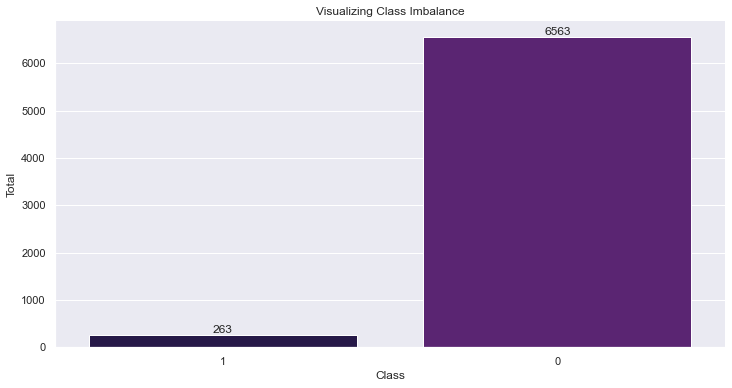

In [31]:
sns.set_style('darkgrid')
sns.set_palette('magma')
yx = sns.countplot(data=Combined_Sp_Pro, x="Class")
yx.bar_label(yx.containers[0])
plt.title('Visualizing Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Total')
fig.set_size_inches(15, 10)
sns.despine()
plt.show()

**The class, as seen above, is highly imbalanced with a mere 4% epitopes belonging to Class 1 and 96% to Class 0.**

### <center> M5 (ii) - Visualizing the distribution of epitope lengths

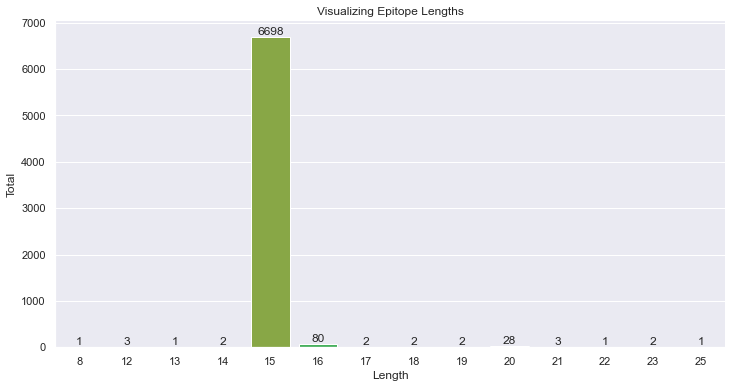

In [32]:
epit_len = []

#Getting the epitope lengths
for length in range(len(Combined_Sp_Pro)):    
    v = len(Combined_Sp_Pro['epit_seq'].iloc[length])
    epit_len.append(v)

#putting it all in a dataframe 
epit_df = pd.DataFrame()
epit_df['epit_len'] = epit_len
epit_df['Class'] = Combined_Sp_Pro['Class']
    
sns.set_style('darkgrid')
sns.set_palette('magma')
yx = sns.countplot(data=epit_df, x="epit_len")
yx.bar_label(yx.containers[0])
plt.title('Visualizing Epitope Lengths')
plt.xlabel('Length')
plt.ylabel('Total')
fig.set_size_inches(15, 10)
sns.despine()
plt.show()

**The epitope lengths can be seen to vary between 8 and 25, however 98% have a length of 15 while lengths 9, 10, 11 and 24 do not exist in this dataset. But we can do an even better analysis:**

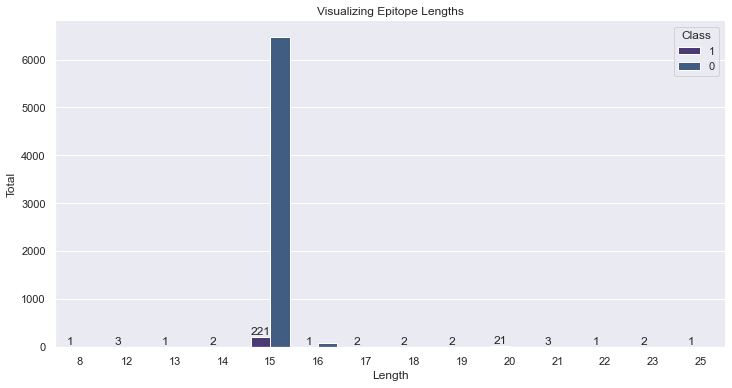

In [33]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
#USing the hue argument allows us to divide the data class wise
yx = sns.countplot(data=epit_df, x="epit_len", hue='Class')
yx.bar_label(yx.containers[0])
plt.title('Visualizing Epitope Lengths')
plt.xlabel('Length')
plt.ylabel('Total')
fig.set_size_inches(15, 10)
sns.despine()
plt.show()

**Dividing each length class wise gives us another insight - 3% of the length 15 epitopes belong to Class 1. This is almost in line with our Class Imbalance analysis.** 

### <center> M5 (iii) - Visualizing the letter frequencies in each class

,variables,positives,negatives
0,A,4.866494,95.133506
1,C,0.000000,100.000000
2,D,5.608696,94.391304
3,E,6.071294,93.928706
4,F,0.380662,99.619338
5,G,1.616162,98.383838
6,H,1.701427,98.298573
7,I,3.089125,96.910875
8,K,5.236022,94.763978
9,L,4.175749,95.824251


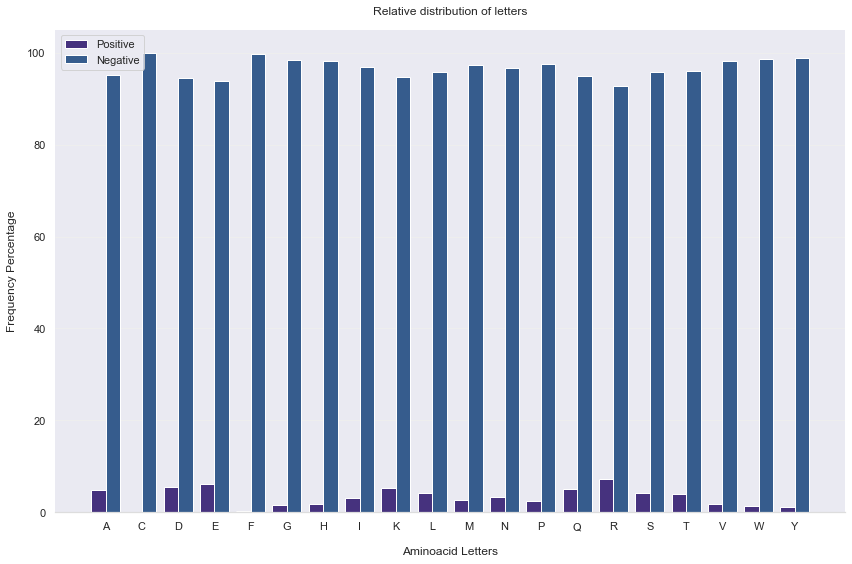

In [13]:
#Creating a list of all the letters to iterate over
all = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

all_df = pd.DataFrame()

#counting letters in each epitope sequence 
for f in all:
    all_df[f] = (Combined_Sp_Pro.epit_seq.str.count(f))

#adding class to this new dataframe   
all_df['Class'] = Combined_Sp_Pro['Class']

length_of_each = []

#finding total of each letter to use as deonominator when finding relative frequency
for g in all:
    dan = sum(all_df[g])
    length_of_each.append(dan)

#calculating all relative frequencies
nex = 0    
for j in all:
    all_df[j] = all_df[j]*100/length_of_each[nex]
    nex += 1

#Separating the positive and negative relative frequencies    
only_pos = all_df[all_df.Class == '1'].drop(['Class'], axis=1)
only_neg = all_df[all_df.Class == '0'].drop(['Class'], axis=1)

len_pos = []
len_neg = []

for g in all:
    dan = sum(only_pos[g])
    nad = sum(only_neg[g])
    len_pos.append(dan)
    len_neg.append(nad)

plot_df = pd.DataFrame()
plot_df['variables'] = all
plot_df['positives'] = len_pos
plot_df['negatives'] = len_neg

#Plotting the relative frequency graph 
sns.set_style('darkgrid')
sns.set_palette('viridis')
x = np.arange(len(plot_df.variables.unique()))
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.4
b1 = ax.bar(x, plot_df['positives'],width = bar_width, label = 'Positive')
b2 = ax.bar(x + bar_width, plot_df['negatives'], width = bar_width, label = 'Negative' )
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(plot_df.variables.unique())

# Add legend
ax.legend()

# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels
ax.set_xlabel('Aminoacid Letters', labelpad=15)
ax.set_ylabel('Frequency Percentage', labelpad=10)
ax.set_title('Relative distribution of letters', pad=15)

fig.tight_layout()
plot_df

**The code above isolates the letter count for each epitope and then further divides them into the two classes. The analysis still displays the imbalance of the classes, however other unique insights can be gained as well, such as:**
- Some letters do not exist in Class 1 at all - e.g. C and F
- Some letters exist relatively more in Class 1 than Class 0 - e.g. E and R

### <center> M6 - The Expanded Dataset

In [14]:
#To generate the expanded dataset, we will use multiple lists to store the relevant data
AA_position = []
AA_window = []
new_start_pos = []
new_end_pos = []

#Since we do not need all the columns anymore, lets make the dataframe a little lean
Combined_Sp_Pro_lean = Combined_Sp_Pro.drop(['pubmed_id', 'year', 'epit_name', 
                                       'evid_code', 'epit_struc_def','sourceOrg_id', 
                                       'n_assays', 'host_id', 'bcell_id', 'assay_type',
                                       'TSeq_accver', 'TSeq_taxid', 'TSeq_orgname', 
                                       'TSeq_defline', 'DB', 'TSeq_sid','n_Positive', 
                                       'n_Negative', 'TSeq_seqtype', 'TSeq_length', 
                                       'assay_class','UID'], axis=1)

print('Dimension of Combined_Sp_Pro_lean is:', Combined_Sp_Pro_lean.shape)

#To expand the epitopes, we will use double nested iterations
#but then we will have no way to append the extracted sets in a sequence as there is no universally forward moving index
#to solve this we create a universal counter and add 1 to it in the double nested iteration
uc = 0
repeat = []

for g in range(len(Combined_Sp_Pro_lean)):
    repeat.append(Combined_Sp_Pro_lean['end_pos'].iloc[g] - Combined_Sp_Pro_lean['start_pos'].iloc[g] + 1)
    new_extracted_sequence = Combined_Sp_Pro_lean["TSeq_sequence"].iloc[g]
    for j in range(repeat[g]):
       AA_position.append(Combined_Sp_Pro_lean['start_pos'].iloc[g] + j)
       new_end_pos.append(AA_position[uc] + 7)
       new_start_pos.append(AA_position[uc] - 7)
       AA_window.append(new_extracted_sequence[int(new_start_pos[uc])-1:new_end_pos[uc]])
       uc += 1
    
Combined_Sp_Pro_lean['repeat'] = repeat

#to repeat the other columns for each iteration of the epitope, we need to copy the same data
final_df = Combined_Sp_Pro_lean.loc[np.repeat(Combined_Sp_Pro_lean.index.values, Combined_Sp_Pro_lean.repeat)]
final_df = final_df.drop('repeat', axis=1).reset_index(drop=True)

final_df['AA_position'] = AA_position
final_df['AA_window'] = AA_window
final_df['new_start_pos'] = new_start_pos
final_df['new_end_pos'] = new_end_pos

#the final dataframe is created and additional columns are then dropped
final_df = final_df.drop(['new_start_pos','new_end_pos','epit_seq','TSeq_sequence','start_pos','end_pos'],axis=1)
print('Dimension of final dataframe is:', final_df.shape)

Dimension of Combined_Sp_Pro_lean is: (6826, 7)
Dimension of final dataframe is: (102659, 5)


**We have successfully extracted all possible epitope sequences from our TSeq_sequence based on the start and end possitions and then found the AA_window using the 15 length sequence (AA_position+-7). The final dataframe now contains over 100,000 rows extracted from 6826 sequences**

In [15]:
final_df

,epitope_id,protein_id,Class,AA_position,AA_window
0,114463,AAB20743.1,1,42,LKFFEIDLTSRPAHG
1,114463,AAB20743.1,1,43,KFFEIDLTSRPAHGG
2,114463,AAB20743.1,1,44,FFEIDLTSRPAHGGK
3,114463,AAB20743.1,1,45,FEIDLTSRPAHGGKT
4,114463,AAB20743.1,1,46,EIDLTSRPAHGGKTE
...,...,...,...,...,...
102654,57290,P02977.2,0,432,KPGNKAVPGKGQAPQ
102655,57290,P02977.2,0,433,PGNKAVPGKGQAPQA
102656,57290,P02977.2,0,434,GNKAVPGKGQAPQAG
102657,57290,P02977.2,0,435,NKAVPGKGQAPQAGT


### <center> M7 - Fully Reproducible

Unlike the Mona Lisa, this report is fully reproducible. Everything should load and work in this Jupyter Notebook, beautifully.

### <center> S1 - Restoring Balance

In [16]:
random.seed(42)

total_pos = 0
total_neg = 0

#counting positives and negatives
for j in range(len(final_df)):
    if final_df['Class'].iloc[j] == '1':
        total_pos += 1
    else:
        total_neg += 1
        
print('Positives:',total_pos,'Negatives:',total_neg)

times_pick = (1.5)*total_pos
balanced_df = pd.DataFrame()

t = 0

#Randomly picking 1.5 times the positive amount
while t < times_pick:
    CheckIndex = random.randrange(len(final_df))
    if final_df['Class'].iloc[CheckIndex] == '0':
        balanced_df = balanced_df.append(final_df.iloc[CheckIndex])
        t += 1
        
for p in range(len(final_df)):
    if final_df['Class'].iloc[p] == '1':
        balanced_df = balanced_df.append(final_df.iloc[p])
        
print('Dimensions of dataframe after S1 is:',balanced_df.shape)

Positives: 4100 Negatives: 98559
Dimensions of dataframe after S1 is: (10250, 5)


**The imbalance between the positive and negative classes went from being 4100:98559 to 4100:6150 - which is a more un-skewed dataset to work with in our ML algorithm.**

### <center> S2 - The AA_window

**Using the AA_window, we will now calculate the relative frequencies of individual letters and pairs of letters existing in each of the new 10250 AA_window values.**

**The code is designed to handle overlap of pairs as well and therefore the total value of pairs in a 15-length sequence is taken to be 14.**

In [27]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#making a backup to be used later
backup = balanced_df.copy(deep=True)

#making list containing all letters
alphabets = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

for f in alphabets:
    balanced_df[f] = (balanced_df.AA_window.str.count(f))/15

Pairs = []

#creating pairs
for l in range(len(alphabets)):
    for o in range(len(alphabets)):
        pair = alphabets[l] + alphabets[o]
        Pairs.append(pair)

for d in Pairs:
    balanced_df[d] = 0        

balanced_df.reset_index(drop=True, inplace=True)

#Checking and appending relative count to pair values
for epseq in range(len(balanced_df)):        
    a = 0
    seq = balanced_df.AA_window[epseq]
    for rep in range(14):
        TruePair = seq[a:a+2]
        a += 1 
        for p in Pairs:
            if TruePair == p:
                balanced_df[p].loc[epseq] = (balanced_df[p].iloc[epseq]) + (1/14)

print('Dimensions of dataframe after S2 is:', balanced_df.shape)

Dimensions of dataframe after S2 is: (10250, 425)


In [18]:
balanced_df

,epitope_id,protein_id,Class,AA_position,AA_window,A,C,D,E,F,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,526331.0,WP_043885001.1,0,150.0,NPFFTAAALAIMVST,0.266667,0.0,0.000000,0.000000,0.133333,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
1,511759.0,KGE60983.1,0,234.0,EVSSAAPAQAPAEKE,0.333333,0.0,0.000000,0.200000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
2,526252.0,BAQ50613.1,0,51.0,INDKIYSLNYNELEV,0.000000,0.0,0.066667,0.133333,0.000000,...,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0,0.0,0,0.0
3,520695.0,WP_043885056.1,0,277.0,KEANFVLASSIKEVG,0.133333,0.0,0.000000,0.133333,0.066667,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
4,515842.0,WP_032461108.1,0,458.0,RFLDNMPQLEGIDIS,0.000000,0.0,0.133333,0.066667,0.066667,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,55542.0,P02977.2,1,275.0,RRDLDASREAKKQLE,0.133333,0.0,0.133333,0.133333,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
10246,55542.0,P02977.2,1,276.0,RDLDASREAKKQLEA,0.200000,0.0,0.133333,0.133333,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
10247,55542.0,P02977.2,1,277.0,DLDASREAKKQLEAE,0.200000,0.0,0.133333,0.200000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0
10248,55542.0,P02977.2,1,278.0,LDASREAKKQLEAEH,0.200000,0.0,0.066667,0.200000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.0


### <center> S3 - Train and Test

In [19]:
from sklearn.model_selection import GroupShuffleSplit

#Selecting randomly - almost 80/20 split 
ToSplit = GroupShuffleSplit(test_size=0.20, n_splits=2, random_state = 21)
Split = ToSplit.split(balanced_df, groups = balanced_df['protein_id'])
tr, te = next(Split)

train = balanced_df.iloc[tr]
test = balanced_df.iloc[te]

train = train.drop(['protein_id', 'epitope_id', 'AA_position', 'AA_window'], axis=1)
test = test.drop(['protein_id', 'epitope_id', 'AA_position', 'AA_window'], axis=1)

print('The percentage allocated to Training data is', len(train)*100/(len(train)+len(test)))
print('The percentage allocated to Test data is', len(test)*100/(len(train)+len(test)))

X_train = train.drop(['Class'], axis=1)
X_test = test.drop(['Class'], axis=1)
y_train = train.Class.iloc[:]
y_test = test.Class.iloc[:]

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

The percentage allocated to Training data is 85.87317073170732
The percentage allocated to Test data is 14.126829268292683


### <center> S4 - ML: Classification

In [20]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)
predictions = LogReg.predict(X_test)
accuracy_score_train = LogReg.score(X_train, y_train)
accuracy_score_test = LogReg.score(X_test, y_test)
print('Accuracy of training: ', accuracy_score_train*100)
print('Accuracy of prediciton: ', accuracy_score_test*100)

Accuracy of training:  85.73051579186549
Accuracy of prediciton:  78.38397790055248


**Our model has produced fairly good percentages of both training and testing - therefore it seems appropriate that it is neither underfitted nor overfitted.** 

### <center> C1 (i) - Shannon Entropy

In [21]:
#We will now use the backup dataframe we saved in S2
backup.reset_index(drop=True, inplace=True)

C1_df = backup.copy()

#making a function to calculate Shannon Entropy
from collections import Counter
from math import log
def shannon(string):
    counts = Counter(string)
    frequencies = ((i / len(string)) for i in counts.values())
    return - sum(f * log(f, 2) for f in frequencies)

Entropy = []

for seqs in range(len(C1_df)):
    Entropy.append(shannon(str(C1_df['AA_window'].iloc[seqs])))
    
C1_df['Shannon_Entropy'] = Entropy    
C1_df

,epitope_id,protein_id,Class,AA_position,AA_window,Shannon_Entropy
0,526331.0,WP_043885001.1,0,150.0,NPFFTAAALAIMVST,3.106891
1,511759.0,KGE60983.1,0,234.0,EVSSAAPAQAPAEKE,2.549255
2,526252.0,BAQ50613.1,0,51.0,INDKIYSLNYNELEV,3.056565
3,520695.0,WP_043885056.1,0,277.0,KEANFVLASSIKEVG,3.240224
4,515842.0,WP_032461108.1,0,458.0,RFLDNMPQLEGIDIS,3.506891
...,...,...,...,...,...,...
10245,55542.0,P02977.2,1,275.0,RRDLDASREAKKQLE,2.923231
10246,55542.0,P02977.2,1,276.0,RDLDASREAKKQLEA,2.923231
10247,55542.0,P02977.2,1,277.0,DLDASREAKKQLEAE,2.872906
10248,55542.0,P02977.2,1,278.0,LDASREAKKQLEAEH,3.006239


**From the calculated Shannon Entropy we can notice that it indeed displays the disorder in our AA_window. When the same letter repeat many times, we get a low entropy value and when the letters are unique, we get a relatively high entropy value. Since entropy is disorder, a high entropy indicates a low information gain, and vice versa.**

### <center> C1 (ii) - Total Molecular Mass and Mean Hydropathy Index

In [22]:
#[2] The data is accessed from an online resource and hard-coded
#Calculating and appending entropy values to Molecular Mass 

Molecular_mass = {"A":89,"R":174,"N":132,"D":133,"C":121,"Q":146,"E":147,"G":75,"H":155,"I":131,"L":131,
                  "K":146,"M":149,"F":165,"P":115,"S":105,"T":119,"W":204,"Y":181,"V":117}
MM = []

window = C1_df['AA_window']  

for c in range (len(window)):
   sum_of_char = []
   sum_of_char = sum([Molecular_mass.get(k) for k in window[c]])
   MM.append(sum_of_char)

C1_df['TMM'] = MM


#Calculating and appending entropy values to Hydropathy Index 

Hydropathy_index = {"A":1.8,"R":-4.5,"N":-3.5,"D":-3.5,"C":2.5,"Q":-3.5,"E":-3.5,"G":-0.4,"H":-3.2,"I":4.5,
                    "L":3.8,"K":-3.9,"M":1.9,"F":2.8,"P":-1.6,"S":-0.8,"T":-0.7,"W":-0.9,"Y":-1.3,"V":4.2}
HI = []

for d in range (len(window)):
   sum_of_char = []
   sum_of_char = sum([Hydropathy_index.get(k) for k in window[d]])/len(C1_df['AA_window'].iloc[d])
   HI.append(sum_of_char)

C1_df['MHI'] = HI

C1_df

,epitope_id,protein_id,Class,AA_position,AA_window,Shannon_Entropy,TMM,MHI
0,526331.0,WP_043885001.1,0,150.0,NPFFTAAALAIMVST,3.106891,1804,1.326667
1,511759.0,KGE60983.1,0,234.0,EVSSAAPAQAPAEKE,2.549255,1735,-0.633333
2,526252.0,BAQ50613.1,0,51.0,INDKIYSLNYNELEV,3.056565,2077,-0.500000
3,520695.0,WP_043885056.1,0,277.0,KEANFVLASSIKEVG,3.240224,1842,0.186667
4,515842.0,WP_032461108.1,0,458.0,RFLDNMPQLEGIDIS,3.506891,1998,-0.233333
...,...,...,...,...,...,...,...,...
10245,55542.0,P02977.2,1,275.0,RRDLDASREAKKQLE,2.923231,2065,-1.893333
10246,55542.0,P02977.2,1,276.0,RDLDASREAKKQLEA,2.923231,1980,-1.473333
10247,55542.0,P02977.2,1,277.0,DLDASREAKKQLEAE,2.872906,1953,-1.406667
10248,55542.0,P02977.2,1,278.0,LDASREAKKQLEAEH,3.006239,1975,-1.386667


### <center> C1 (iii) - Total number of C, H, N, O, and S atoms

In [23]:
#Hard-coding the relevant data for the given atoms into dictionaries, accessed from an online resource [3]

Carbon = {"A":3,"R":6,"N":4,"D":4,"C":3,"Q":5,"E":5,"G":2,"H":6,"I":6,
          "L":6,"K":6,"M":5,"F":9,"P":5,"S":3,"T":4,"W":11,"Y":9,"V":5}

Hydrogen = {"A":7,"R":14,"N":8,"D":7,"C":7,"Q":10,"E":9,"G":5,"H":9,"I":13,
          "L":13,"K":14,"M":11,"F":11,"P":9,"S":7,"T":9,"W":12,"Y":11,"V":11}

Nitrogen = {"A":1,"R":4,"N":2,"D":1,"C":1,"Q":2,"E":1,"G":1,"H":3,"I":1,
          "L":1,"K":2,"M":1,"F":1,"P":1,"S":1,"T":1,"W":2,"Y":1,"V":1}

Oxygen = {"A":2,"R":2,"N":3,"D":4,"C":2,"Q":3,"E":4,"G":2,"H":2,"I":2,
          "L":2,"K":2,"M":2,"F":2,"P":2,"S":3,"T":3,"W":2,"Y":3,"V":2}

Sulphur = {"A":0,"R":0,"N":0,"D":0,"C":1,"Q":0,"E":0,"G":0,"H":0,"I":0,
          "L":0,"K":0,"M":1,"F":0,"P":0,"S":0,"T":0,"W":0,"Y":0,"V":0}

#Making a list of dictionaries to call in loop
dict_atoms = [Carbon, Hydrogen , Nitrogen, Oxygen, Sulphur]
#Making a list of names of dictionaries to include in dataframe
atoms_names = ['Carbon', 'Hydrogen' , 'Nitrogen', 'Oxygen', 'Sulphur']
iterator = 0

#looping over each atoms values for every AA_window value
for atoms in dict_atoms:   
    tempo = []
    for d in range (len(window)):
       total_atoms = []
       total_atoms = sum([atoms.get(k) for k in window[d]])
       tempo.append(total_atoms)
    C1_df[atoms_names[iterator]] = tempo
    iterator += 1

C1_df

,epitope_id,protein_id,Class,AA_position,AA_window,Shannon_Entropy,TMM,MHI,Carbon,Hydrogen,Nitrogen,Oxygen,Sulphur
0,526331.0,WP_043885001.1,0,150.0,NPFFTAAALAIMVST,3.106891,1804,1.326667,72,140,16,34,1
1,511759.0,KGE60983.1,0,234.0,EVSSAAPAQAPAEKE,2.549255,1735,-0.633333,62,129,17,39,0
2,526252.0,BAQ50613.1,0,51.0,INDKIYSLNYNELEV,3.056565,2077,-0.500000,82,155,19,42,0
3,520695.0,WP_043885056.1,0,277.0,KEANFVLASSIKEVG,3.240224,1842,0.186667,71,146,18,37,0
4,515842.0,WP_032461108.1,0,458.0,RFLDNMPQLEGIDIS,3.506891,1998,-0.233333,76,150,20,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,55542.0,P02977.2,1,275.0,RRDLDASREAKKQLE,2.923231,2065,-1.893333,74,159,27,40,0
10246,55542.0,P02977.2,1,276.0,RDLDASREAKKQLEA,2.923231,1980,-1.473333,71,152,24,40,0
10247,55542.0,P02977.2,1,277.0,DLDASREAKKQLEAE,2.872906,1953,-1.406667,70,147,21,42,0
10248,55542.0,P02977.2,1,278.0,LDASREAKKQLEAEH,3.006239,1975,-1.386667,72,149,23,40,0


**Repeating the same form of algorithm for all the given values of different atoms and appending the data to a final dataframe shows us how the number of atoms vary for the different epitope sequences under the AA_window.**

### <center> C2 - Three Important Visualizations

**Visualization 1: Molecules and Atoms**

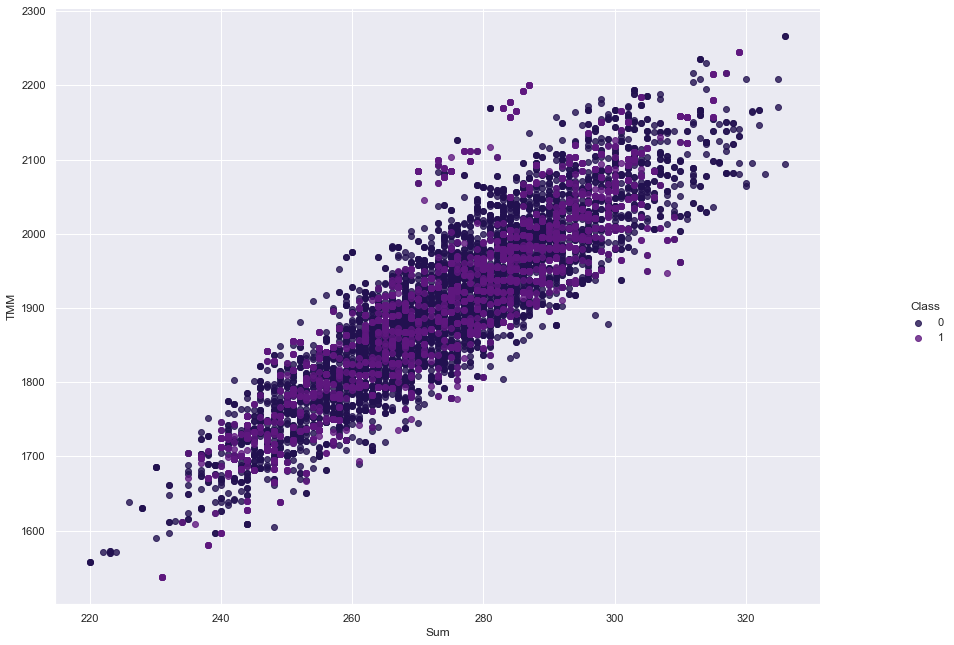

In [24]:
#Finding mass of all atoms together
C1_df = C1_df.eval('Sum = Carbon + Nitrogen + Hydrogen + Oxygen + Sulphur')

sns.set_style('darkgrid')
sns.set_palette('magma')
#Plotting total atomic mass against total molecular mass
sns.lmplot('Sum', 'TMM', C1_df, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

**The graph obtained is something we should have expected. It makes logical sense to assume that the Total Atomic and Total Molecular Mass will be highly correlated - and that is exactly what we see here. Since molecules compose of atoms, this result is unsurprisingly correct.**

**Visualization 2: Atoms vs Atoms**

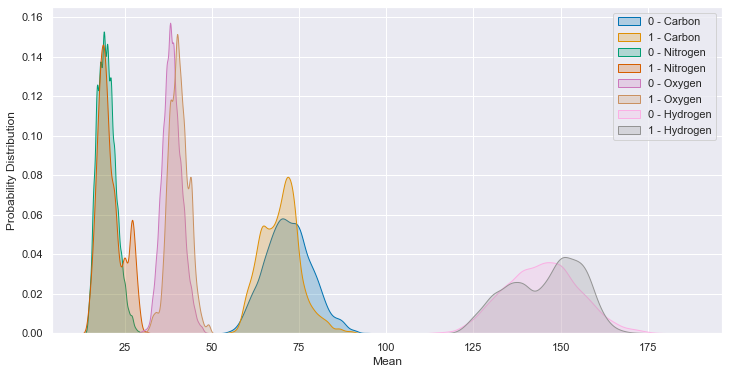

In [25]:
zero_df = C1_df[C1_df['Class'] == '0']
one_df = C1_df[C1_df['Class'] == '1']

sns.set_style('darkgrid')
sns.set_palette('colorblind')

sns.kdeplot(data = zero_df.Carbon, shade = True, label ='0 - Carbon')
sns.kdeplot(data = one_df.Carbon, shade = True, label ='1 - Carbon')

sns.kdeplot(data = zero_df.Nitrogen, shade = True, label ='0 - Nitrogen')
sns.kdeplot(data = one_df.Nitrogen, shade = True, label ='1 - Nitrogen')

sns.kdeplot(data = zero_df.Oxygen, shade = True, label ='0 - Oxygen')
sns.kdeplot(data = one_df.Oxygen, shade = True,  label ='1 - Oxygen')

sns.kdeplot(data = zero_df.Hydrogen,shade = True, label ='0 - Hydrogen')
sns.kdeplot(data = one_df.Hydrogen,shade = True, label ='1 - Hydrogen')

plt.xlabel('Mean')
plt.ylabel('Probability Distribution')
plt.legend()

plt.show()

**We have displayed a class-wise categorization of the individual probability distribution functions of C, H, N and O atoms. The result shows that the class variation in the existence of these atoms in the AA_window is mostly equal for both Positive and Negative class as seen via visual inspection.**

**Visualization 3: MHI vs TMM**

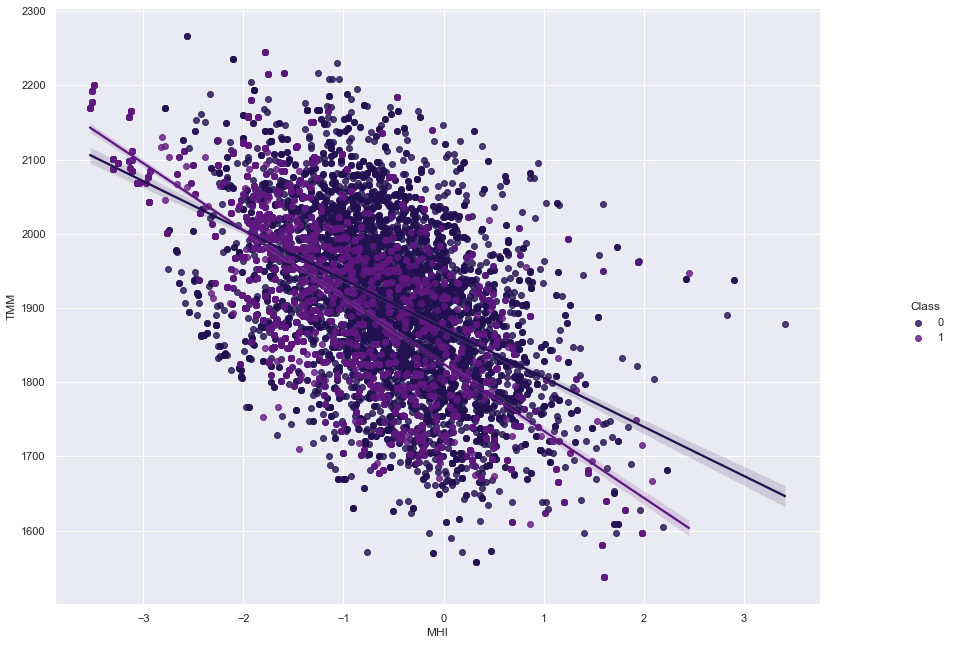

In [26]:
sns.set_style('darkgrid')
sns.set_palette('magma')
sns.lmplot(x = 'MHI', y = 'TMM', data = C1_df, hue='Class', fit_reg=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

**Does the Mean Hydropathy Index have any correlation with the Total Molecular Mass? The data when plotted suggests that the correlation is very weakly negative, if at all present. This indicates that perhaps we need to either uncover more features within our dataset to build more powerful prediction ML models or employ other techniques such as hypertuning of parameters or dimensionality reduction to gain more insight.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### References: 

- [1] Immunology, P., 2022. What is an Epitope?. [online] Pacificimmunology.com. Available at: <https://www.pacificimmunology.com/resources/antibody-introduction/what-is-an-epitope/> [Accessed 25 April 2022].
- [2] Education, I., 2022. IMGT Education. [online] Imgt.org. Available at: <https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html> [Accessed 25 April 2022].
- [3] Dropbox. 2022. Atoms.csv. [online] Available at: <https://www.dropbox.com/s/mz8tmta5kkxp2gn/Atoms.csv> [Accessed 25 April 2022].

**_The End._**